#### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#### Loading the dataset

In [2]:
dataset=pd.read_excel('Biogas data_b.xlsx')
df=dataset.copy()

In [3]:
df

,Temperature (o C),pH,Retention time (days),Total solids (mg/kg),Volatile solids (mg/kg),Actual biogas yield (10-4 m3/kg VS)
0,30.02,7.90,20.03,5.94,4.01,1538.5
1,39.98,7.90,29.88,11.45,11.83,1530.4
2,30.43,7.99,20.05,6.64,4.11,1618.5
3,39.85,6.59,25.46,11.79,11.60,1508.3
4,39.98,6.53,29.57,11.98,7.08,1401.1
5,39.52,6.52,25.39,10.86,11.51,1720.1
6,40.00,7.72,29.99,11.03,10.89,1611.2
7,39.93,7.08,29.23,11.89,9.23,1770.2
8,39.68,6.68,29.68,9.99,11.24,1663.1
9,39.56,7.41,29.89,11.42,11.77,1671.2


#### Statistical Description of the dataset

In [4]:
df.describe()

,Temperature (o C),pH,Retention time (days),Total solids (mg/kg),Volatile solids (mg/kg),Actual biogas yield (10-4 m3/kg VS)
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,38.209200,7.340800,27.432800,10.271200,8.727200,1606.870000
std,3.147712,0.553622,3.336951,1.597946,2.940883,98.373746
min,30.000000,6.520000,20.000000,5.940000,4.000000,1238.300000
25%,38.000000,6.740000,26.407500,10.000000,5.477500,1542.700000
50%,39.620000,7.485000,29.205000,10.710000,10.180000,1619.900000
75%,39.987500,7.880000,29.710000,11.390000,11.165000,1671.275000
max,40.000000,8.000000,30.000000,11.980000,11.970000,1770.200000


C:\users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

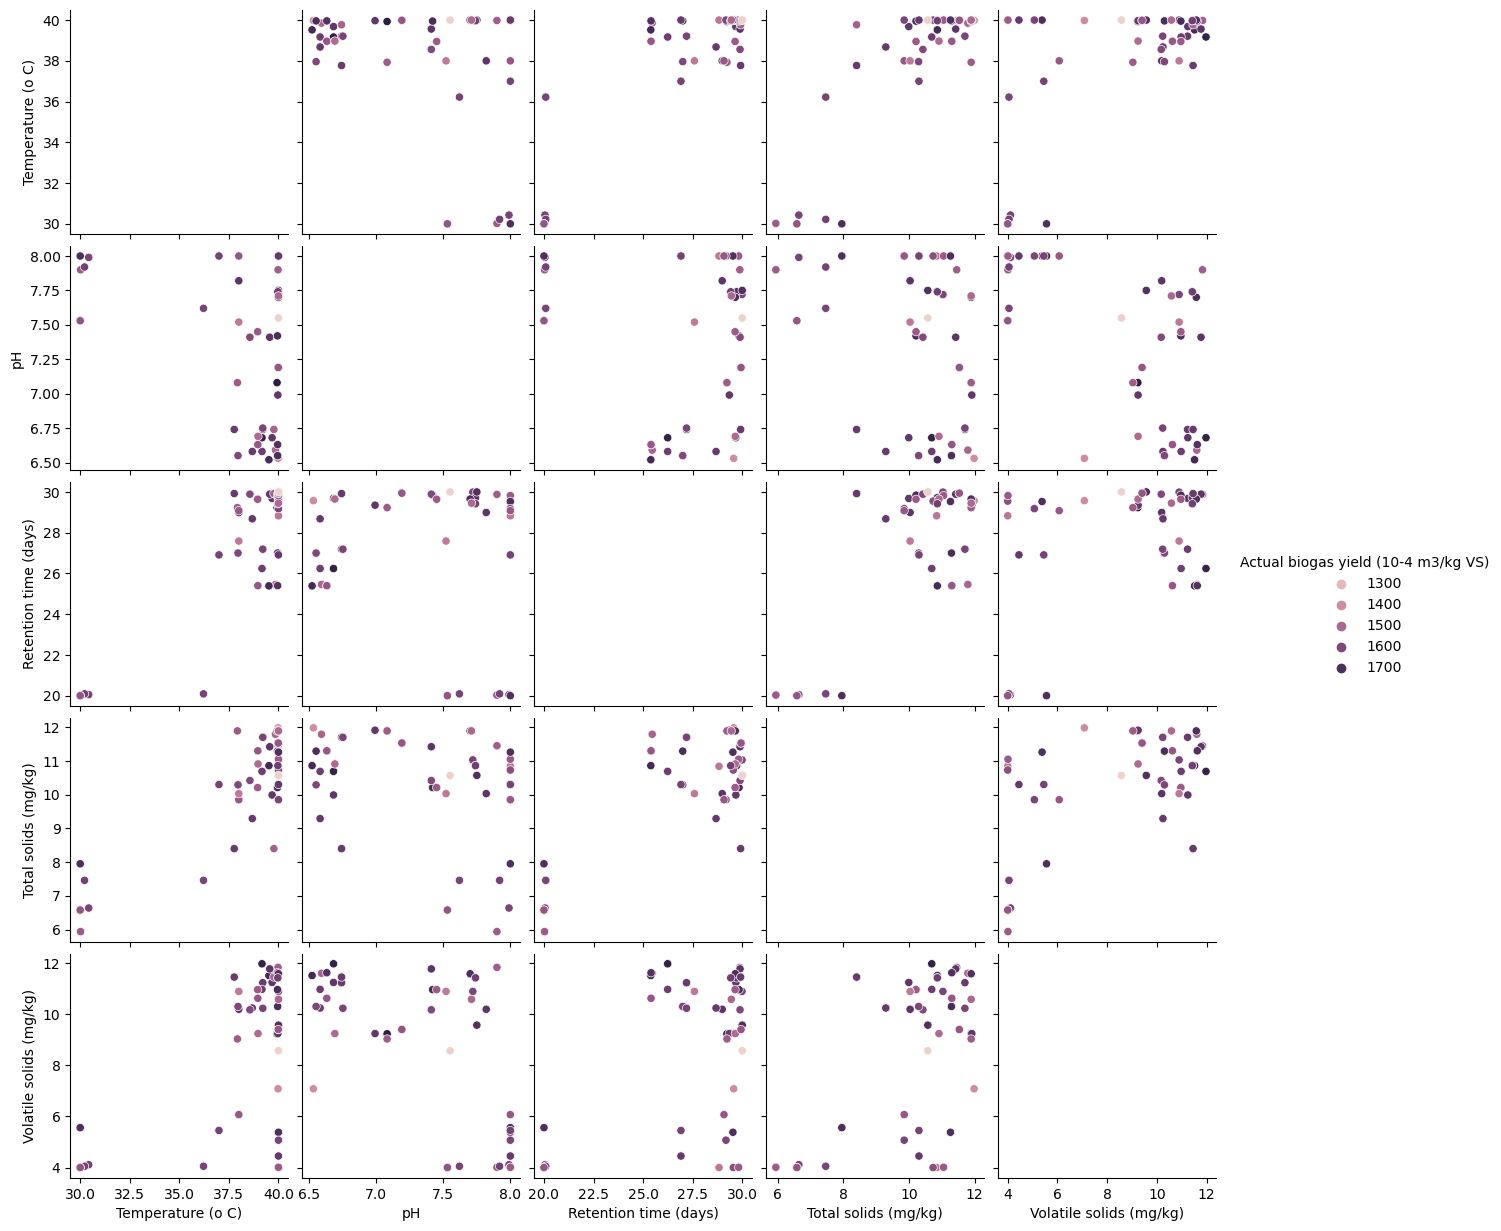

In [5]:
sns.pairplot(df, hue ='Actual biogas yield (10-4 m3/kg VS)')
plt.show()

#### Seperating the dataset into the input and output variables

In [6]:
x=df.drop(['Actual biogas yield (10-4 m3/kg VS)'],axis=1)
y=df['Actual biogas yield (10-4 m3/kg VS)']

In [7]:
x.shape,y.shape

((50, 5), (50,))

#### Data Splitting

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.30)

In [9]:
x_train.shape,y_test.shape

((35, 5), (15,))

#### Data Normalization

In [10]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler= MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [11]:
y_train=np.array(y_train)
y_train=y_train.reshape(-1,1)
y_train.shape

(35, 1)

In [12]:
#y_test=np.array(y_test)
#y_test=y_train.reshape(-1,1)
#y_test.shape

In [13]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
gb = GradientBoostingRegressor()           #max_features='auto',learning_rate=0.001,n_estimators=100,tol=1e-5)
gb = gb.fit(x_train,y_train)
gb.score(x_train,y_train)

C:\users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9557850080674211

In [17]:
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [18]:
prediction=gb.predict(x_test)
predictiont=gb.predict(x_train)

In [19]:
prediction.shape,y_test.shape

((15,), (15,))

In [20]:
mse=mean_squared_error(y_test,prediction)

In [21]:
mse1=mean_squared_error(y_train,predictiont)

In [22]:
r2_score(y_test,prediction)

-1.8297720463557146

In [23]:
r2_score(y_train,predictiont)

0.9557850080674211

In [24]:
import math
rmse=math.sqrt(mse)
rmse

118.44591931465176

In [25]:
rmse1=math.sqrt(mse1)
rmse1

22.230209658281066

In [26]:
print(prediction[1])
print(y_test.iloc[1])

1643.1416725970741
1618.5


In [27]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
model=RandomForestRegressor(ccp_alpha=0.01,max_depth=200,random_state=30)
                             
model.fit(x_train,y_train)
pred_rf=model.predict(x_test)
predt_rf=model.predict(x_train)
model.get_params()

C:\users\admin\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'bootstrap': True,
 'ccp_alpha': 0.01,
 'criterion': 'squared_error',
 'max_depth': 200,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 30,
 'verbose': 0,
 'warm_start': False}

In [30]:
predictions=model.predict(x_test)
predictiont=model.predict(x_train)

#### Finding the root mean squared error and the coefficient of correlation

In [31]:
mse_rf=mean_squared_error(y_test,pred_rf)
mse1_rf=mean_squared_error(y_train,predt_rf)

In [32]:
import math
rmse_rf=math.sqrt(mse_rf)
rmse_rf

110.17943316497234

In [33]:
import math
rmse_rft=math.sqrt(mse1_rf)
rmse_rft

48.55985426613822

In [34]:
print(r2_score(y_test,pred_rf))
print(r2_score(y_train,predt_rf))

-1.4485688122498996
0.789021994577856


In [35]:
print(predictions[1])

1646.092


In [36]:
y_test.iloc[1]

1618.5

In [37]:
from sklearn import svm
from sklearn.svm import SVR

#### Building the SVM model

In [38]:
vm=SVR(kernel='poly',gamma='scale',degree=5,epsilon= 0.1,tol=0.0001,C=100)         
vm.fit(x_train,y_train)

C:\users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, degree=5, kernel='poly', tol=0.0001)

In [39]:
vm.get_params()

{'C': 100,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 5,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.0001,
 'verbose': False}

In [40]:
ypred_vm=vm.predict(x_test)
ypredt_vm=vm.predict(x_train)

In [41]:
r2_score(y_test,ypred_vm)

-16.187147571418233

In [42]:
r2_score(y_train,ypredt_vm)

0.6957962868055929

In [43]:
MSE=mean_squared_error(y_test,ypred_vm)

In [44]:
MSE1=mean_squared_error(ypredt_vm,y_train)

In [45]:
rms=math.sqrt(MSE)
rms

291.90818991883555

In [46]:
rme=math.sqrt(MSE1)
rme

58.30973115201991

In [47]:
print(prediction[10:20])
print(y_test.iloc[10:20])

[1645.02453788 1654.4407296  1672.27882076 1569.12702475 1613.83420682]
15    1704.5
47    1559.5
0     1538.5
34    1650.3
20    1711.9
Name: Actual biogas yield (10-4 m3/kg VS), dtype: float64


In [ ]:
mae_vm=mean_absolute_error(y_test,ypred_vm)
mae_vm

In [ ]:
mae_vmt=mean_absolute_error(ypredt_vm,y_train)
mae_vmt

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor(criterion='mse',max_depth=200,ccp_alpha=0.01,
                           max_features='sqrt',splitter='best', 
                          random_state=0)                 
dt.fit(x_train,y_train)     

In [ ]:
dt.get_params()

In [ ]:
predictions_dt=dt.predict(x_test)
predt_dt=dt.predict(x_train)

In [ ]:
print('The Accuracy for the testing dataset is:',r2_score(y_test,predictions))
print('The Accuracy for the training dataset is:',r2_score(y_train,predt_dt))

In [ ]:
MSE_dt=mean_squared_error(y_test,predictions)
MSE1_dt=mean_squared_error(y_train,predt_dt)

In [ ]:
rme_dt=math.sqrt(MSE_dt)
rme1_dt=math.sqrt(MSE1_dt)

In [ ]:
print(rme_dt)
print(rme1_dt)

In [ ]:
print(predictions[1:6])
print(y_test.iloc[1:6])

In [ ]:
mae=mean_absolute_error(y_test,predictions)
mae

In [ ]:
mae1=mean_absolute_error(y_train,predt_dt)
mae1